<a href="https://colab.research.google.com/github/NineDERP/PatternFinal/blob/main/Copy_of_Reading_Image_form_a_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math as mt
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
path="/content/drive/My Drive/data/digit.csv"
df =pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
seed = 0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(80,) ,activation='logistic',learning_rate_init=0.1,solver='adam',max_iter=1000,tol=0.000001,verbose=1,random_state=2)
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.97422496
Iteration 2, loss = 3.00630242
Iteration 3, loss = 2.52465740
Iteration 4, loss = 2.07144692
Iteration 5, loss = 1.73527966
Iteration 6, loss = 1.38539629
Iteration 7, loss = 1.24805669
Iteration 8, loss = 1.28684055
Iteration 9, loss = 1.21252640
Iteration 10, loss = 1.00853695
Iteration 11, loss = 1.04272939
Iteration 12, loss = 1.11728112
Iteration 13, loss = 1.01621627
Iteration 14, loss = 0.94823730
Iteration 15, loss = 0.98154344
Iteration 16, loss = 0.91940081
Iteration 17, loss = 0.88027354
Iteration 18, loss = 0.87931480
Iteration 19, loss = 0.82899927
Iteration 20, loss = 0.77074002
Iteration 21, loss = 0.79144678
Iteration 22, loss = 0.76152368
Iteration 23, loss = 0.75103393
Iteration 24, loss = 0.75350312
Iteration 25, loss = 0.75378142
Iteration 26, loss = 0.75524220
Iteration 27, loss = 0.75232144
Iteration 28, loss = 0.73460579
Iteration 29, loss = 0.72997085
Iteration 30, loss = 0.75310311
Iteration 31, loss = 0.76107518
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(80,),
              learning_rate_init=0.1, max_iter=1000, random_state=2, tol=1e-06,
              verbose=1)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp, x_test, y_test, cv=cv, scoring='accuracy')
y_pred = cross_val_predict(mlp, x_test, y_test, cv=cv)

Iteration 1, loss = 2.45838225
Iteration 2, loss = 3.31771901
Iteration 3, loss = 2.98879940
Iteration 4, loss = 2.33949095
Iteration 5, loss = 1.84479313
Iteration 6, loss = 1.73622897
Iteration 7, loss = 1.52227010
Iteration 8, loss = 1.39478231
Iteration 9, loss = 1.33682163
Iteration 10, loss = 1.10586313
Iteration 11, loss = 0.91663023
Iteration 12, loss = 0.78419644
Iteration 13, loss = 0.82276253
Iteration 14, loss = 0.87905820
Iteration 15, loss = 0.86895334
Iteration 16, loss = 0.79856289
Iteration 17, loss = 0.73735764
Iteration 18, loss = 0.67774344
Iteration 19, loss = 0.64764865
Iteration 20, loss = 0.60287409
Iteration 21, loss = 0.60278528
Iteration 22, loss = 0.63854354
Iteration 23, loss = 0.67279897
Iteration 24, loss = 0.66318870
Iteration 25, loss = 0.63367054
Iteration 26, loss = 0.57627555
Iteration 27, loss = 0.56072649
Iteration 28, loss = 0.53374577
Iteration 29, loss = 0.55285790
Iteration 30, loss = 0.48735149
Iteration 31, loss = 0.49719702
Iteration 32, los

In [ ]:
print("Cross-validation scores for each fold: ", scores)
print("Mean cross-validation accuracy: ", np.mean(scores))

Cross-validation scores for each fold:  [0.48 0.64 0.72 0.56 0.68]
Mean cross-validation accuracy:  0.6160000000000001


In [ ]:
mlp.score(x_test,y_test)

0.696

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 8  0  1  1  0  1  0  0  0  0]
 [ 0  9  0  0  0  2  0  0  0  0]
 [ 4  1  2  2  0  0  1  0  2  0]
 [ 0  0  2  9  0  0  1  0  1  0]
 [ 0  0  1  0 11  0  0  0  0  3]
 [ 1  0  1  1  0  6  0  0  1  0]
 [ 1  0  2  0  1  0 12  0  0  0]
 [ 1  1  0  1  1  0  0  7  4  0]
 [ 1  1  1  0  1  0  0  0 10  1]
 [ 0  0  0  0  3  0  0  0  1  3]]


In [ ]:
!git clone https://github.com/AjMing/Pattern-EGCI463.git
#Make a simple clone the whole, you can select the image partially

fatal: destination path 'Pattern-EGCI463' already exists and is not an empty directory.


In [ ]:

import os
import pickle
from skimage.io import imread
from skimage.transform import resize
input_dir = 'Pattern-EGCI463/Image data/'
categories = ['cats','dogs', 'horses']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)


In [ ]:

os.path.join(input_dir, category, file)


'Pattern-EGCI463/Image data/horses/horse-188.jpg'

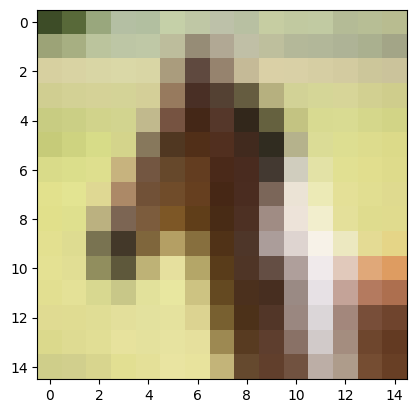

In [ ]:
#show one of the image
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
X = np.array(data)
y = np.array(labels)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(160,), activation='relu',learning_rate_init = 0.15, solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(160,), learning_rate_init=0.15, max_iter=500,
              random_state=42)

In [ ]:
y_pred = mlp.predict(X_test_scaled)

In [ ]:
mlp.score(X_test_scaled,Y_test)

0.5986842105263158

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp, X_test_scaled, Y_test, cv=cv, scoring='accuracy')
y_pred = cross_val_predict(mlp, X_test_scaled, Y_test, cv=cv)

In [ ]:
print("Cross-validation scores for each fold: ", scores)
print("Mean cross-validation accuracy: ", np.mean(scores))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[26  2 31]
 [19  2 24]
 [20  0 28]]
